# Investigating Fandango Movie Ratings

In October 2015, a journalist named Walt Hickey analyzed movie ratings data and found strong evidence that Fandango's rating system was biased and dishonest. Fandango employs a 5 star rating system, where the ratings are on the order of 0 to 5 stars. Mr. Hickey discovered a discrepency between the actual rating and the number of stars displayed to users. The actual rating was almost always rounded up to the nearest half-star. For example, a 4.1 movie would be rounded to 4.5 stars, rather than 4.

Fandango claimed that this was due to a bug in their system. Presumably, this has since been fixed, but we can't tell for sure because the actual rating value isn't displayed anymore in the page's HTML. In this project, I will analyse more recent movie rating data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

In order to accomplish this, I will compare the characteristics of the system before and after Hickey's analysis.
- Hickey published the data he analysed on [GitHub](https://github.com/fivethirtyeight/data/tree/master/fandango), so I will use this to analyze the characteristics of Fandango's system before his analysis. 
- One of Dataquest's team members collected movie ratings data for movies released in 2016 and 2017. The data is publicly available on [GitHub](https://github.com/mircealex/Movie_ratings_2016_17) and I will use it to analyze the rating system's characteristics after Hickey's analysis.

In [1]:
import pandas as pd
before = pd.read_csv('fandango_score_comparison.csv')
after = pd.read_csv('movie_ratings_16_17.csv')

In [2]:
before.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [3]:
after.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


I will isolate the columns that offer information about Fandango's ratings in separate variables so that I have just the data we're interested in more readily available for use later.

In [4]:
f_before = before[['FILM',  'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
f_after = after[['movie', 'year', 'fandango']]

Our goal is to determine whether there has been any change in Fandango's rating system after Hickey's analysis. The population of interest for our analysis is all of the movie ratings stored on Fandango's website, regardless of the releasing year.

[Hickey's article](https://fivethirtyeight.com/features/fandango-movies-ratings/) and from his [README.md](https://github.com/fivethirtyeight/data/blob/master/fandango/README.md) show that he used the following sampling criteria:

    The movie must have had at least 30 fan ratings on Fandango's website at the time of sampling (Aug. 24, 2015).
    The movie must have had tickets on sale in 2015.

The sampling was not random because not every movie had the same chance to be included in the sample — movies having under 30 fan ratings or those without tickets on sale in 2015 were not included. This sample may not be a good representation of the entire population because it is subject to temporal trends - movies in 2015 may have been better or worse than movies from other years.

The other sample's [README.md](https://github.com/mircealex/Movie_ratings_2016_17/blob/master/README.md) shows that its sampling conditions were:

    The movie must have been released in 2016 or later.
    The movie must have had a considerable number of votes and reviews (unclear how many from the README.md or from the data).

This sample is also subject to temporal trends and is unlikely to be representative of our population of interest.

Both of these authors had certain research questions in mind when the sampled the data, and the criteria they used to get the sample would fir their questions. While these samples were good enough for their research, they don't seem too useful to us to accomplish our goal.


**Changing our goal**

The samples collected are not representative enough of the entire population to use useful to our goal, but we can still use them to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. This new goal should also be a fairly good proxy for our initial goal.

With this new goal, we have two populations that we want to describe and compare with eachother.
- All Fandango's ratings for popular movies released in 2015.
- All Fandango's ratings for popular movies released in 2016.

The term 'popular' refers to Hickey's benchmark of having at least 30 fan ratings on Fandango's website. Our sample for after Hickey's analysis does not contain the number of fan ratings, so we will have to check to make sure that the sample is representative of popular movies.

One way to show with high confidence that this is the case is to randomly select 10 movies from the 'after' DF and check their number of ratings on Fandango's website.

In [5]:
f_after.sample(10, random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


As of April 2018, these are the fan ratings we found:

|Movie          |Fan ratings|
|:--------------|:---------:|
|Mechanic: Resurrection |2247|
|Warcraft 	|7271|
|Max Steel 	|493|
|Me Before You |5263|
|Fantastic Beasts and Where to Find Them|13400|
|Cell|17|
|Genius|127|
|Sully|11877|
|A Hologram for the King|500|
|Captain America: Civil War|35057|

9/10 movies in our sample are popular. This is enough and we move forward with some confidence.


Now we want to isolate only the movies from 2015 and 2016.

We will start with Hickey's data, and also ensure that all movies have > 30 votes.

In [13]:
#Get year from title
f_before['Year'] = f_before['FILM'].str[-5:-1].astype(int)
f_before.head()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [14]:
f_before['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

There are 17 movies from 2014 that we want to remove

In [15]:
f_2015 = f_before[f_before['Year'] == 2015]
f_2015.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [17]:
f_2016 = f_after[f_after['year'] == 2016]
f_2016.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0


### Comparing the Distributions

I will start by making a high-level comparison between the shapes of the distributions of movie ratings of both samples

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

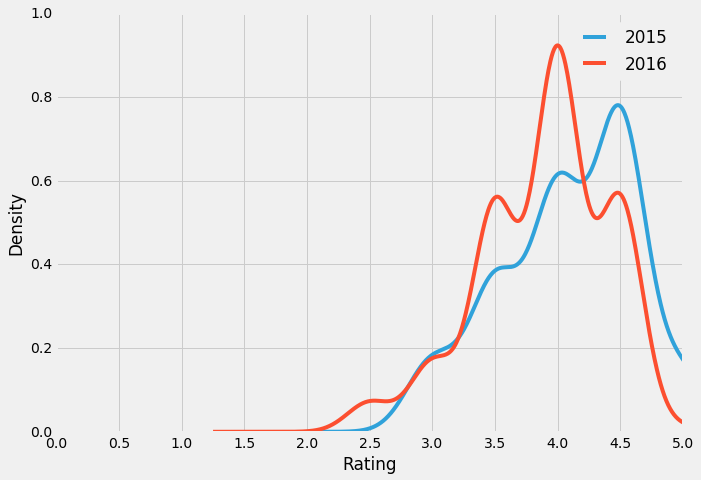

In [26]:
from numpy import arange
plt.style.use('fivethirtyeight')

f_2015['Fandango_Stars'].plot.kde(label='2015', legend=True, figsize=(10,7))
f_2016['fandango'].plot.kde(label='2016', legend=True)

plt.title=('Comparing distribution shapes of Fandango ratings from 2015 and 2016')
plt.xlabel('Rating')
plt.ylabel('Density')
plt.xlim(0,5)
plt.xticks(arange(0,5.1,.5))
plt.show()


In analyzing these distributions, we can quickly see that:
- Both distributions are strongly left skewed. This shows that most of the movies received a much higher rating than 2.5
- The 2016 movies are slightly more to the left than the 2015 movies, showing that in 2016 the rating values were slightly lower than from 2015.

The 2016 movies appear to be normally distributed around the 4.0 rating, while the 2015 movies appear to still be left skewed comparatively.


### Comparing Frequency Distributions

We are doing good so far, but we need to analyze more granular information. Let's examine the frequency tables of the two distributions. Since the two samples have different numbers of movies, we will use relative frequencies rather than absolute.

In [29]:
print('2015:')
f_2015['Fandango_Stars'].value_counts(normalize=True).sort_index() * 100

2015:


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [30]:
print('2016:')
f_2016['fandango'].value_counts(normalize=True).sort_index() * 100

2016:


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In 2015 the percentage of 5 star movies was much higher than in 2016, and the most common rating was a 4.5 star, with a 4.0 star following closely behind. In 2016, the most common rating was a 4 star, with 3.5 and 4.5 having approximately equal ratings.

This supports the claim that Fandango's rating system rounded ratings up to the next half star in 2015, and changed this to rounding to the closest star in 2016.

### Summary Statistics

While the frequency distributions shed light on the change in movie ratings, it was difficult to see the direction as compared to the Kernel Density Plots. I will now compute some summary statistics on the data to determine how the mean, median, and mode changed from 2015 to 2016.

In [33]:
mean_2015 = f_2015['Fandango_Stars'].mean()
mean_2016 = f_2016['fandango'].mean()
median_2015 = f_2015['Fandango_Stars'].median()
median_2016 = f_2016['fandango'].median()
mode_2015 = f_2015['Fandango_Stars'].mode()[0] 
mode_2016 = f_2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


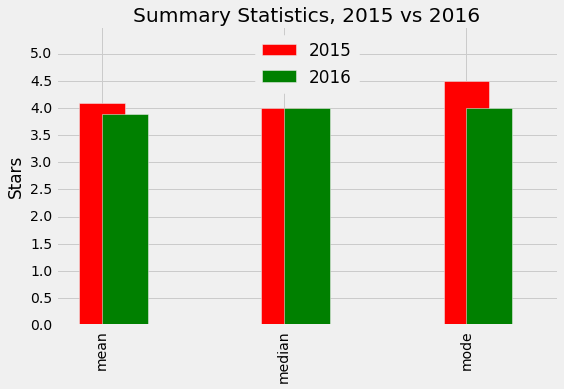

In [37]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = 'red', align = 'center', label = '2015', width = .25, 
                         title = 'Summary Statistics, 2015 vs 2016', rot = 0, figsize = (8,5))
summary['2016'].plot.bar(color = 'green', align = 'edge', label = '2016', width = .25)

plt.legend(loc = 'upper center')
plt.ylabel('Stars')
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))

plt.show()

In [42]:
mean_pct_change = 100 * (summary.loc['mean'][1] - summary.loc['mean'][0]) / summary.loc['mean'][0]
print('Mean percent change:', round(mean_pct_change, 2), '%')

Mean percent change: -4.84 %


The mean decreased by approx. 5% from 2015 to 2016. While the median is the same for both 2015 and 2016, the mode is lower in 2016 by 0.5.

This confirms that what we saw in our kernel density plot is correct - the average movie ratings decreased from 2015 to 2016.

### Conclusion

Our analysis shows that there is a slight difference between Fandango's ratings for popular movies in 2015 and 2016. Though it cannot be confirmed, there is a high probability that this change was at least partially caused by Hickey's analysis and Fandango subsequently fixing the bug in their system. 